## Kiva Loan Funding - Data Selection

**PURPOSE**: Predict which microfinance loans will be funded

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- Kiva Developer Tools: https://www.kiva.org/build/data-snapshots
    
**REV DATE**: 5-4-2021

In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('max_columns', None)

### Data Import

In [3]:
#import dataset originally from http://s3.kiva.org/snapshots/kiva_ds_csv.zip
loans = pd.read_csv('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/raw/loans.csv')

### Initial Exploration

In [3]:
loans.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

In [4]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,372964,JENELYN,English,"At the age of 20, Jenelyn is married and has o...",NaN,175.0,175.0,funded,952522.0,NaN,General Store,Retail,"to buy sardines, instant noodles, soap, and de...",PH,Philippines,"Liwan Sur, Enrile, Cagayan",shared,0.2,PHP,123.0,2011-12-20 06:04:56.000 +0000,NaN,2011-11-24 08:00:00.000 +0000,2012-01-02 09:01:26.000 +0000,8.0,7,1,1,NaN,JENELYN,female,true,monthly,field_partner
1,1037234,Zohra\t,English,Zohra is a housewife with four children residi...,Zohra is a housewife with four children residi...,400.0,400.0,funded,2124057.0,NaN,Retail,Retail,to invest in her husband's automobile business.,PK,Pakistan,Rawalpindi,shared,0.1,PKR,247.0,2016-03-11 11:24:20.000 +0000,2016-04-13 07:30:02.000 +0000,2016-02-18 08:00:00.000 +0000,2016-04-12 23:29:40.000 +0000,13.0,15,2,1,"#Parent, user_favorite",Zohra\t,female,true,monthly,field_partner
2,1037493,Suma Inti Group,Spanish,La A.C. “Suma Inti” iniciará el segundo ciclo ...,The “Suma Inti” communal bank is starting thei...,3400.0,3400.0,funded,2124476.0,NaN,Butcher Shop,Food,"to buy meat, pasta and oil wholesale.",BO,Bolivia,El Alto,shared,0.1,BOB,59.0,2016-03-11 22:00:46.000 +0000,2016-04-14 17:10:02.000 +0000,2016-02-27 08:00:00.000 +0000,2016-03-24 08:31:37.000 +0000,10.0,82,3,2,"#Repeat Borrower, user_favorite, user_favorite...","Eliza Betty, Olga, Dora, Aurora, Gladys, Nelly...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner
3,1800053,Irene,English,Irene is a married woman with five children. S...,Irene is a married woman with five children. S...,150.0,150.0,funded,3204329.0,NaN,Fish Selling,Food,to buy a variety of fish to sell and other sup...,PH,Philippines,"Calbayog City 2, Samar",shared,0.1,PHP,145.0,2019-07-17 05:42:15.000 +0000,2019-08-18 00:30:06.000 +0000,2019-06-18 07:00:00.000 +0000,2019-07-19 13:01:53.000 +0000,8.0,6,2,1,"#Woman Owned Biz, user_favorite",Irene,female,true,monthly,field_partner
4,542923,Duo Perlas De Ramirez Group,Spanish,\n\n\nDUO PERLAS DE RAMIREZ\n\nESTA FORMADO PO...,Perlas de Ramirez group.\r\n\r\nThis group has...,775.0,775.0,funded,1321915.0,NaN,Food Production/Sales,Food,to buy ingredients for making tamales,GT,Guatemala,"Barcenas,Villa Nueva",shared,0.1,GTQ,97.0,2013-03-26 15:15:18.000 +0000,2013-04-26 12:20:03.000 +0000,2013-03-22 07:00:00.000 +0000,2013-03-28 01:46:04.000 +0000,8.0,29,1,1,NaN,"Sandra, Marta","female, female","true, true",monthly,field_partner


In [5]:
loans.describe().round(2)

,LOAN_ID,FUNDED_AMOUNT,LOAN_AMOUNT,IMAGE_ID,VIDEO_ID,CURRENCY_EXCHANGE_COVERAGE_RATE,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1926374.00,1926374.00,1926374.00,1880820.00,1019.00,1534009.00,1906829.00,1926350.00,1926374.00,1926374.00,1926374.00
mean,980993.46,777.81,819.24,1954238.73,2870.06,0.11,164.40,13.14,21.35,1.53,1.14
std,564956.79,1098.04,1209.00,941850.17,1106.04,0.04,102.75,7.30,28.83,1.04,0.50
min,84.00,0.00,25.00,241.00,7.00,0.00,1.00,1.00,0.00,1.00,1.00
25%,493351.25,275.00,275.00,1234500.75,2451.50,0.10,107.00,8.00,8.00,1.00,1.00
50%,980791.50,500.00,500.00,2043564.50,2965.00,0.10,145.00,13.00,14.00,1.00,1.00
75%,1469071.75,925.00,975.00,2769549.25,3544.00,0.10,185.00,14.00,26.00,2.00,1.00
max,1963429.00,100000.00,499975.00,3535083.00,4772.00,0.20,609.00,195.00,3234.00,124.00,62.00


##### Data Spread
Kiva started offering loans in 2006 and their business has grown since. The total loans provided leveled off in ~2017.  

*Not all of the loans from 2020 were included in the dataset. 

In [76]:
# of loans posted in each year
loans['POSTED_TIME'] = pd.to_datetime(loans['POSTED_TIME'] )
loans['MONTH']= loans.POSTED_TIME.dt.month 
loans['YEAR']= loans.POSTED_TIME.dt.year
loans.POSTED_TIME.dt.year.value_counts().sort_index(ascending = False)

2020     57324
2019    219005
2018    229633
2017    225476
2016    197236
2015    181835
2014    174232
2013    140035
2012    133847
2011    113009
2010     92902
2009     81629
2008     50697
2007     26314
2006      3200
Name: POSTED_TIME, dtype: int64

Text(0, 0.5, 'Total Dollars Borrowered')

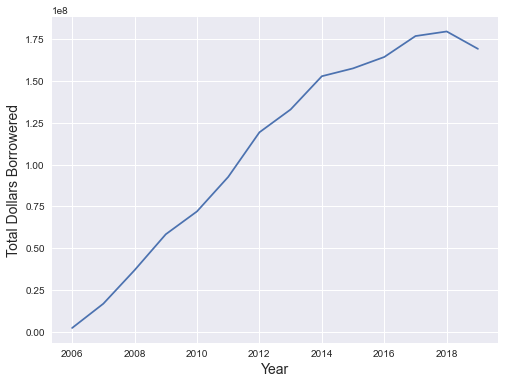

In [70]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(loans[~loans.POSTED_TIME.dt.year.isin(['2020'])].pivot_table(index = loans.POSTED_TIME.dt.year, values=['LOAN_AMOUNT'], aggfunc =['sum']))
ax.set_title('Total Dollars Loaned by Year', fontsize = 20)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Total Dollars Loaned', fontsize = 14)


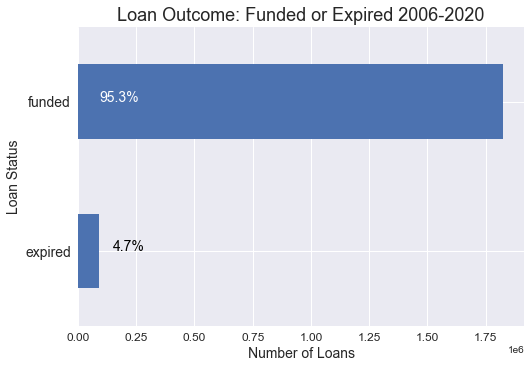

In [77]:
plt.style.use('seaborn')
loans[loans.STATUS.isin(['funded', 'expired'])].groupby('STATUS').LOAN_ID.count().plot(kind ='barh')
plt.title('Loan Outcome: Funded or Expired 2006-2020', fontsize =18)
plt.xlabel('Number of Loans', fontsize =14)
plt.ylabel('Loan Status', fontsize =14)
plt.annotate("95.3%", xy =(90000,1), color = 'white', fontsize =14)
plt.annotate("4.7%", xy =(150000,0), color = 'black', fontsize =14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [15]:
loans[loans.STATUS.isin(['funded', 'expired'])].groupby('STATUS').LOAN_ID.count()

STATUS
expired      90299
funded     1825027
Name: LOAN_ID, dtype: int64

In [22]:
loans[loans.STATUS.isin(['funded', 'expired'])].groupby('STATUS').LOAN_AMOUNT.sum()

STATUS
expired    1.298470e+08
funded     1.434680e+09
Name: LOAN_AMOUNT, dtype: float64

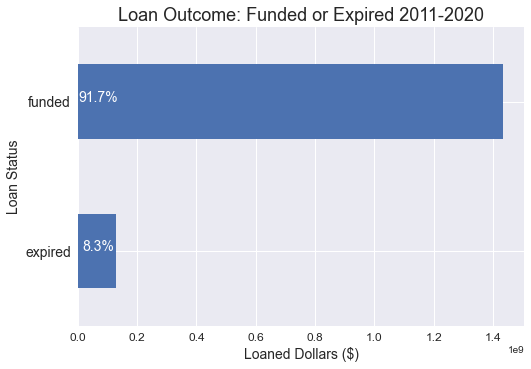

In [29]:
plt.style.use('seaborn')
loans[(loans.STATUS.isin(['funded', 'expired']))].groupby('STATUS').LOAN_AMOUNT.sum().plot(kind ='barh')
plt.title('Loan Outcome: Funded or Expired 2011-2020', fontsize =18)
plt.xlabel('Loaned Dollars ($)', fontsize =14)
plt.ylabel('Loan Status', fontsize =14)
plt.annotate("91.7%", xy =(500000,1), color = 'white', fontsize =14)
plt.annotate("8.3%", xy =(14250000,0), color = 'white', fontsize =14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
#plt.ticklabel_format(useOffset=False, style='plain') 
plt.show()

In [36]:
loanamounts = pd.DataFrame(loans[(loans.STATUS.isin(['funded', 'expired']))&(loans.POSTED_TIME.dt.year.between(2011,2019))].pivot_table(index =loans.POSTED_TIME.dt.year, columns=['STATUS'], values=['LOAN_AMOUNT', 'FUNDED_AMOUNT'], aggfunc =['sum']).to_records())
loanamounts.columns = ['YEAR', 'EXP_FUNDED','FUND_FUNDED','EXP_LOAN','FUND_LOAN']
loanamounts=loanamounts[['YEAR','FUND_LOAN','EXP_LOAN','EXP_FUNDED']]
loanamounts['KIVA_COVERED']=loanamounts.EXP_LOAN - loanamounts.EXP_FUNDED
loanamounts

,YEAR,EXP_FUNDED,FUND_FUNDED,EXP_LOAN,FUND_LOAN
0,2011,93300.0,91865950.0,119775.0,91865950.0
1,2012,5495900.0,108926600.0,9933725.0,108926600.0
2,2013,5492695.0,123466225.0,9119725.0,123466225.0
3,2014,7971315.0,138534650.0,14050450.0,138534650.0
4,2015,9926940.0,138033325.0,18916700.0,138033325.0
5,2016,8590780.0,142556425.0,21049825.0,142556425.0
6,2017,6699250.0,160642775.0,15886500.0,160642775.0
7,2018,6395950.0,158296200.0,20229125.0,158296200.0
8,2019,6038100.0,148631325.0,19574600.0,148631325.0


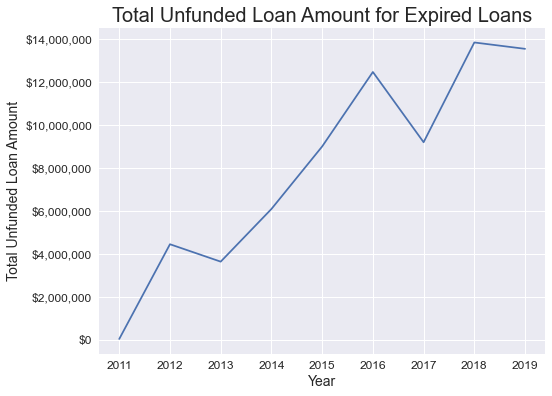

In [69]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(data = loanamounts, x='YEAR', y='KIVA_COVERED')
plt.title('Total Unfunded Loan Amount for Expired Loans', fontsize =20)
plt.xlabel('Year' , fontsize =14)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel('Total Unfunded Loan Amount' , fontsize =14)
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.show()

### Seasonality 
To understand if there is any seasonality to the frequency of loan funding, a quick analysis was completed to visualize the patterns over the last 8 years.  Visually, the data does not seem to show consistent trends based on the time of year. 

In [78]:
loan_month =  pd.DataFrame(loans[loans.STATUS.isin(['expired','funded'])].pivot_table(index =['YEAR','MONTH'], columns ='STATUS', values ='POSTED_TIME', aggfunc ='count', fill_value =0).to_records())
loan_month['PERCENT_FUNDED']=loan_month.funded/(loan_month.funded + loan_month.expired)
loan_month

,YEAR,MONTH,expired,funded,PERCENT_FUNDED
0,2006,4,0,259,1.000000
1,2006,5,0,72,1.000000
2,2006,6,0,81,1.000000
3,2006,7,0,66,1.000000
4,2006,8,0,122,1.000000
...,...,...,...,...,...
165,2020,1,131,16354,0.992053
166,2020,2,125,17197,0.992784
167,2020,3,64,15048,0.995765
168,2020,4,20,5999,0.996677


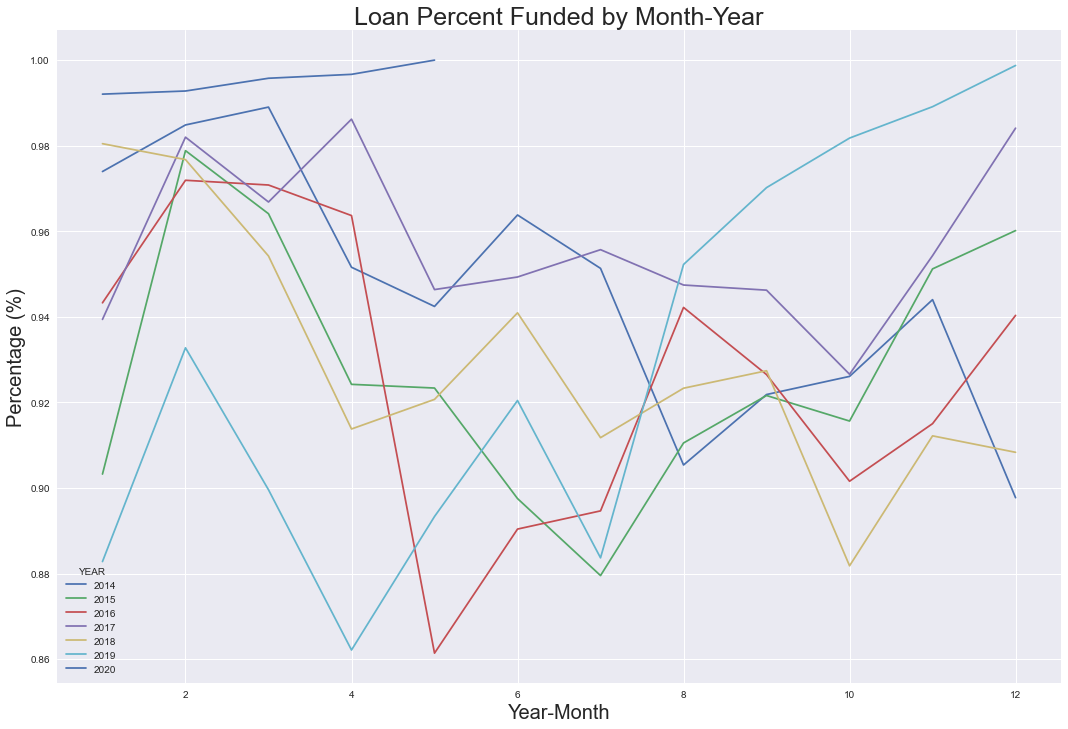

In [79]:
loan_month[loan_month.YEAR >2013].pivot_table(index ='MONTH', columns ='YEAR', values ='PERCENT_FUNDED').plot(figsize=(18,12))
plt.title('Loan Percent Funded by Month-Year', fontsize =25)
plt.ylabel('Percentage (%)', fontsize = 20)
plt.xlabel('Year-Month', fontsize =20)
plt.show()

In [74]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,372964,JENELYN,English,"At the age of 20, Jenelyn is married and has o...",NaN,175.0,175.0,funded,952522.0,NaN,General Store,Retail,"to buy sardines, instant noodles, soap, and de...",PH,Philippines,"Liwan Sur, Enrile, Cagayan",shared,0.2,PHP,123.0,2011-12-20 06:04:56+00:00,NaN,2011-11-24 08:00:00.000 +0000,2012-01-02 09:01:26.000 +0000,8.0,7,1,1,NaN,JENELYN,female,true,monthly,field_partner
1,1037234,Zohra\t,English,Zohra is a housewife with four children residi...,Zohra is a housewife with four children residi...,400.0,400.0,funded,2124057.0,NaN,Retail,Retail,to invest in her husband's automobile business.,PK,Pakistan,Rawalpindi,shared,0.1,PKR,247.0,2016-03-11 11:24:20+00:00,2016-04-13 07:30:02.000 +0000,2016-02-18 08:00:00.000 +0000,2016-04-12 23:29:40.000 +0000,13.0,15,2,1,"#Parent, user_favorite",Zohra\t,female,true,monthly,field_partner
2,1037493,Suma Inti Group,Spanish,La A.C. “Suma Inti” iniciará el segundo ciclo ...,The “Suma Inti” communal bank is starting thei...,3400.0,3400.0,funded,2124476.0,NaN,Butcher Shop,Food,"to buy meat, pasta and oil wholesale.",BO,Bolivia,El Alto,shared,0.1,BOB,59.0,2016-03-11 22:00:46+00:00,2016-04-14 17:10:02.000 +0000,2016-02-27 08:00:00.000 +0000,2016-03-24 08:31:37.000 +0000,10.0,82,3,2,"#Repeat Borrower, user_favorite, user_favorite...","Eliza Betty, Olga, Dora, Aurora, Gladys, Nelly...","female, female, female, female, female, female...","true, true, true, true, true, true, true, true...",monthly,field_partner
3,1800053,Irene,English,Irene is a married woman with five children. S...,Irene is a married woman with five children. S...,150.0,150.0,funded,3204329.0,NaN,Fish Selling,Food,to buy a variety of fish to sell and other sup...,PH,Philippines,"Calbayog City 2, Samar",shared,0.1,PHP,145.0,2019-07-17 05:42:15+00:00,2019-08-18 00:30:06.000 +0000,2019-06-18 07:00:00.000 +0000,2019-07-19 13:01:53.000 +0000,8.0,6,2,1,"#Woman Owned Biz, user_favorite",Irene,female,true,monthly,field_partner
4,542923,Duo Perlas De Ramirez Group,Spanish,\n\n\nDUO PERLAS DE RAMIREZ\n\nESTA FORMADO PO...,Perlas de Ramirez group.\r\n\r\nThis group has...,775.0,775.0,funded,1321915.0,NaN,Food Production/Sales,Food,to buy ingredients for making tamales,GT,Guatemala,"Barcenas,Villa Nueva",shared,0.1,GTQ,97.0,2013-03-26 15:15:18+00:00,2013-04-26 12:20:03.000 +0000,2013-03-22 07:00:00.000 +0000,2013-03-28 01:46:04.000 +0000,8.0,29,1,1,NaN,"Sandra, Marta","female, female","true, true",monthly,field_partner


### Data Set 

Two different sample populations will be used to build & test the models.  The first dataset will be the 2nd half of 2019 (July-December 2019).  The second set will be a randomly selected set of 110,000 loans between 2011-2019. 

In [10]:
#create new table for loan data for 2nd half of 2019 to be used to build model 
loans_2019 = loans[loans.POSTED_TIME.between('07-01-2019','12-31-2019')].sort_values('POSTED_TIME', ascending = False).reset_index(drop = True).copy()

#export new table to interim dataset 
loans_2019.to_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_2019.pkl')

In [11]:
#create new table for loan data that includes 110000 loans between 2011-2019
loans_rand = loans[loans.POSTED_TIME.dt.year.between(2011,2019)].sample(n = 110000, random_state = 27) 

#export to new table to interim dataset 
loans_rand.to_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Kiva_Capstone_Project/data/interim/loans_rand.pkl')

In [3]:
loans['POSTED_TIME'] = pd.to_datetime(loans['POSTED_TIME'] )
loans['YEAR']=loans.POSTED_TIME.dt.year
loans['MONTH']=loans.POSTED_TIME.dt.month